In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score,cohen_kappa_score, r2_score
from math import sqrt

In [3]:
#Displays all column data
pd.set_option('display.max_columns', None)
#Removes unrequired warnings
pd.options.mode.chained_assignment = None
#Set directory to file location
cwd = os.getcwd()
path = '//Users//Ryan1//Desktop//CE802-2020-21-ML and Data Mining//Assignment//CE802_P3_Data'
os.chdir(path)

#Importing the dataset
dataset = pd.read_csv('CE802_P3_Data.csv')

# Initial investigation

In [4]:
#Initial statistics of the dataset
dataset.describe()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,93.168033,11.828000,190.808320,-6.788620,1376.728553,1092.897040,-10.495153,8.109187,274.393133,-345.797880,12.124980,20.426667,7.894667,16633.036680,922.082533
std,29.857614,5.430108,2322.462888,9.072751,301.420683,592.936195,3.040026,5.812853,42.241393,87.920436,8.681726,4.183142,3.673405,8886.071078,1092.331874
min,-25.550000,0.000000,0.000000,-35.070000,350.680000,-1035.560000,-20.200000,0.080000,83.890000,-653.160000,0.120000,-7.190000,0.000000,-22890.400000,0.000000
25%,73.120000,9.000000,0.390000,-13.140000,1175.880000,682.885000,-12.475000,3.815000,253.320000,-403.890000,5.835000,18.535000,6.000000,12544.200000,0.000000
50%,93.215000,12.000000,3.030000,-6.780000,1373.145000,1098.550000,-10.600000,6.740000,274.455000,-343.380000,10.245000,20.445000,8.000000,16635.150000,429.570000
75%,114.035000,15.000000,20.415000,-0.420000,1585.802500,1498.155000,-8.540000,10.945000,294.392500,-286.860000,16.477500,22.405000,10.000000,21105.420000,1530.205000
max,198.390000,30.000000,82423.590000,20.280000,2427.610000,3081.120000,-0.430000,45.140000,555.360000,-76.740000,70.170000,36.680000,22.000000,57340.060000,3960.010000


array([[<AxesSubplot:title={'center':'Target'}>]], dtype=object)

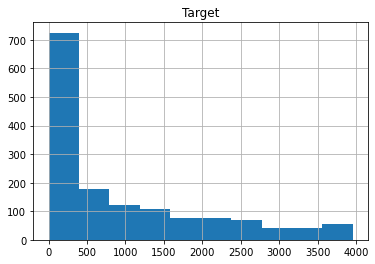

In [5]:
#Produces a histogram showing the distribution of the Target column values
dataset.hist(column = 'Target')

In [6]:
#Replace categorical data with ordinal values to retain relationship
transform = {"F15": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
dataset.replace(transform, inplace=True)
#Perform one hot encoding to transform categorical data into numerical
dataset = pd.get_dummies(dataset, columns= ['F4'])
#Re-arranges the dataset so Target is at the end
dataset = dataset[['F1','F2','F3','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F4_Europe','F4_Rest','F4_UK','F4_USA','Target']]

In [7]:
#This splits out the data from Target variable
X = dataset.iloc[:, 0:19]
#Isolates the Target column from the dataset
Y = dataset.iloc[:, [19]]

In [8]:
#Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [9]:
#Define the standard scaler
scaler = StandardScaler()
#Define the Linear Regression, Support Vector Regression and KNN Regression models
LR_model = LinearRegression()
SVR_model = SVR()
knn_model = KNeighborsRegressor()

In [10]:
#Create and fit pipeline to the training set for Linear Regression
LR_pipeline = Pipeline(steps=[('s', scaler), ('m', LR_model)])
LR_pipe = LR_pipeline.fit(X_train, Y_train.values.ravel())
#Use the trained Linear Regression model to predict on the test data
LR_y_pred = LR_pipe.predict(X_test)

In [11]:
#Create and fit pipeline to the training set for SVR Regression
SVR_pipeline = Pipeline(steps=[('s', scaler), ('m', SVR_model)])
SVR_pipe = SVR_pipeline.fit(X_train, Y_train.values.ravel())
#Use the trained SVR model to predict on the test data
SVR_y_pred = SVR_pipe.predict(X_test)

In [12]:
#Create and fit pipeline to the training set for KNN Regression
knn_pipeline = Pipeline(steps=[('s', scaler), ('m', knn_model)])
knn_pipe = knn_pipeline.fit(X_train, Y_train.values.ravel())
#Use the trained KNN model to predict on the test data
knn_y_pred = knn_pipe.predict(X_test)

In [13]:
#Function that takes the predictions from the models and prints evaluation metrics
def results(y_pred):
    #Calculates and prints the Mean squared error, Mean Absolute Error, Root Mean Squared Error and R Squared score
    Mean_squared_error = mean_squared_error(y_pred, Y_test)
    Mean_absolute_error = mean_absolute_error(y_pred, Y_test)
    Root_mean_squared_error = sqrt(Mean_squared_error)
    RSquared = r2_score(y_pred, Y_test)
    print('Mean Squared Error: {} \nMean Absolute Error: {} \nRoot Mean Squared Error: {} \nRSquared: {}\n'
          .format(Mean_squared_error,Mean_absolute_error,Root_mean_squared_error,RSquared))

In [14]:
#Results of the Linear Regression model
results(LR_y_pred)

Mean Squared Error: 217412.33090205278 
Mean Absolute Error: 357.2279094513018 
Root Mean Squared Error: 466.2749520423039 
RSquared: 0.7605796450100254



In [15]:
#Results of the SVR model
results(SVR_y_pred)

Mean Squared Error: 1395810.759948567 
Mean Absolute Error: 821.0668710617264 
Root Mean Squared Error: 1181.4443533017402 
RSquared: -4303.988092331198



In [16]:
#Results of the KNN model
results(knn_y_pred)

Mean Squared Error: 431498.5461730934 
Mean Absolute Error: 449.03814666666665 
Root Mean Squared Error: 656.885489391487 
RSquared: 0.12108305846336909



# Investigating the effect of scaling Target by a constant (1000)

In [17]:
#This splits out the data from the Target column
X = dataset.iloc[:, 0:19]
#Isolates the Target column from the dataset
Y = dataset.iloc[:, [19]]

In [18]:
#Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y/1000, test_size = 0.2,random_state = 0)

In [19]:
#Produce a table of correlation score between the X_train variables and the Y_train (Target) variable
X_train.corrwith(Y_train.Target)

F1          -0.000308
F2          -0.247543
F3           0.029544
F5           0.035558
F6          -0.274950
F7          -0.285668
F8          -0.020522
F9           0.338018
F10         -0.014475
F11         -0.441578
F12          0.331219
F13          0.021060
F14          0.210751
F15          0.257954
F16          0.026292
F4_Europe   -0.005123
F4_Rest     -0.237815
F4_UK       -0.038231
F4_USA       0.267662
dtype: float64

In [20]:
#Drop uncorrelated columns and re-arrange to have Target at the end
dataset = dataset[['F2','F6','F7','F9','F11','F12','F14','F15','F4_Europe','F4_Rest','F4_UK','F4_USA','Target']]

In [21]:
#Function that prints results for each fold of the gridsearch
def gridsearch_results(results):
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    for mean_scores, st_dev_score, parameters in zip(mean_score, std_score, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean_scores, 3), round(st_dev_score * 2, 3), parameters))
    print('\033[1m'+'\nBest Parameters: {}\n'.format(results.best_params_)+'\033[0m')

In [22]:
#Function for the initial training/testing/evaluating of the models on the scaled Target variable
def initial_gridsearch_cv(model, params, scaler):
    model = model
    parameters = params
    #Creates pipeline that takes the specified scaler and model
    reg_pipeline = Pipeline(steps=[('s', scaler), ('m', model)])
    #Applies gridsearch with the defined pipeline, parameters and selected number of cross validations
    cv_reg = GridSearchCV(reg_pipeline, parameters, cv=10)
    #Fits gridsearch to the training data
    cv_reg1 = cv_reg.fit(X_train, Y_train.values.ravel())
    #Runs each fold through print_results function to provide scores for each comparison
    gridsearch_results(cv_reg1)
    #Applies the optimal parameters from Gridsearch on to the test set
    reg_Y_pred = cv_reg1.predict(X_test)
    #Runs the model with optimal parameters identified by gridsearch into the evaluation function
    reg_evaluation(reg_Y_pred, Y_test)

In [23]:
def reg_evaluation(reg_Y_pred, reg_Y_test):
    #Rescales the predictions and test sets
    rescaled_Ypred = reg_Y_pred*1000
    rescaled_Ytest = reg_Y_test*1000
    #Calculates and prints the Mean squared error, Mean Absolute Error, Root Mean Squared Error and R Squared score
    Mean_squared_error = round(mean_squared_error(rescaled_Ytest, rescaled_Ypred),2)
    Mean_absolute_error = round(mean_absolute_error(rescaled_Ytest, rescaled_Ypred),2)
    Root_mean_squared_error = round(sqrt(Mean_squared_error),2)
    RSquared = round(r2_score(rescaled_Ytest, rescaled_Ypred),2)
    print('Mean Squared Error: {} \nMean Absolute Error: {} \nRoot Mean Squared Error: {} \nRSquared: {}\n'
          .format(Mean_squared_error,Mean_absolute_error,Root_mean_squared_error,RSquared))

In [24]:
#Creates a list of selected models to iterate through function
model = [LR_model, SVR_model, knn_model]

In [25]:
#Specifies each models parameters to be used in gridsearch
LR_param = {
'm__fit_intercept': ('True', 'False'),
'm__normalize': ('True', 'False'), 
}
SVR_param = {
'm__kernel': ('linear','rbf'),
'm__C': [1, 10, 100],
'm__gamma': ('auto','scale')
}
knn_param = {
'm__n_neighbors':[5,50,100],
'm__weights':('uniform','distance'),
'm__metric':('minkowski', 'euclidean', 'manhattan', 'chebyshev')
}
#Creates a list of selected parameters to iterate through function
params = [LR_param, SVR_param, knn_param]

In [26]:
#Iterates through the list of chosen models/parameters and feeds into the gridsearch function
for i in range(len(model)):
        mod = model[i]
        param = params[i]
        scaler = scaler
        print('Model: ',mod)
        initial_gridsearch_cv(mod, param, scaler)

Model:  LinearRegression()
0.772 (+/-0.053) for {'m__fit_intercept': 'True', 'm__normalize': 'True'}
0.772 (+/-0.053) for {'m__fit_intercept': 'True', 'm__normalize': 'False'}
0.772 (+/-0.053) for {'m__fit_intercept': 'False', 'm__normalize': 'True'}
0.772 (+/-0.053) for {'m__fit_intercept': 'False', 'm__normalize': 'False'}

Best Parameters: {'m__fit_intercept': 'True', 'm__normalize': 'True'}

Mean Squared Error: 217412.33 
Mean Absolute Error: 357.23 
Root Mean Squared Error: 466.27 
RSquared: 0.81

Model:  SVR()
0.762 (+/-0.05) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.881 (+/-0.038) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.762 (+/-0.05) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.881 (+/-0.038) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.762 (+/-0.05) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.889 (+/-0.041) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.762 (+/-0.05) for {'m__C': 1

# Classification-regression model

Part 1: Classification of Zero/Non-zero values

In [27]:
#Re-imports the dataset to create the two part classification-regression model
dataset = pd.read_csv('CE802_P3_Data.csv')

In [28]:
#Replace categorical data with ordinal values to retain relationship
transform = {"F15": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
dataset.replace(transform, inplace=True)

#Perform one hot encoding to transform categorical data into numerical
dataset = pd.get_dummies(dataset, columns= ['F4'])

#Drop columns with low correlation with Target and re-arrange dataset to have Target at the end
dataset = dataset[['F2','F6','F7','F9','F11','F12','F14','F15','F4_Europe','F4_Rest','F4_UK','F4_USA','Target']]

#Create a class label based on whether Target is zero. True for zero values and False for non-zero values
dataset['Class'] = np.where(dataset['Target']==0, 'True', 'False')
dataset.head()

,F2,F6,F7,F9,F11,F12,F14,F15,F4_Europe,F4_Rest,F4_UK,F4_USA,Target,Class
0,6,1030.95,614.70,11.96,-333.60,1.86,6,4,0,0,1,0,1605.31,False
1,12,1059.87,1354.00,3.80,-356.04,6.39,2,0,1,0,0,0,0.00,True
2,6,1320.03,1477.96,20.32,-353.58,13.14,8,1,0,0,0,1,3241.77,False
3,12,1696.92,750.14,4.78,-254.37,15.48,10,0,0,0,0,1,0.00,True
4,3,1451.37,251.06,2.06,-379.77,3.90,10,0,0,1,0,0,336.25,False


In [29]:
#This splits out the data from Target/Class
X = dataset.iloc[:, 0:12]
#Selects class as the Y variable. Target isn't required for the classification at the moment so is leftout
Y = dataset.iloc[:, [13]]

In [30]:
#Split training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state = 0)

In [31]:
#Provides classification evaluation scores (Accuracy/Precision/Recall/Confusion Matrix/Kappa Score)
def evaluation(cv1, y_pred):
    accuracy = round(accuracy_score(Y_test, y_pred), 3)
    precision = round(precision_score(Y_test, y_pred,pos_label="True"), 3)
    recall = round(recall_score(Y_test, y_pred,pos_label="True"), 3)
    conf_matrix = confusion_matrix(Y_test, y_pred)  
    print('Accuracy: {} / Precision: {} / Recall: {}'.format(accuracy,precision,recall))
    print('Confusion Matrix\n',conf_matrix)
    #Plots the confusion matrix
    plot_confusion_matrix(cv1, X_test, Y_test)  
    plt.show() 
    print('Kappa score',cohen_kappa_score(Y_test, y_pred))

In [32]:
#List of classification models chosen for gridsearch to iterate through function
model = [SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]
#Parameters to be used in the gridsearch for each classification model
SVC_param = {
'm__kernel': ('linear','rbf'),
'm__C': [1, 10, 100],
'm__gamma': ('auto','scale')
}
dt_param = {
'm__splitter': ('best','random'),
'm__criterion' :['gini', 'entropy'],
'm__max_depth': [2, 10, 20, None]
}
knn_param = {
'm__n_neighbors':[5,50,100],
'm__weights':('uniform','distance'),
'm__metric':('minkowski', 'euclidean', 'manhattan', 'chebyshev')
}
#List of the parameters to iterate through function
params = [SVC_param, dt_param, knn_param]
#Scaler to be used for all models
scaler = StandardScaler()

In [33]:
#Gridsearch function taking models/parameters/scalers
def gridsearch_cv(model, params, scaler):
    model = model
    parameters = params
    #Creates pipeline that takes the specified scaler and model
    pipeline = Pipeline(steps=[('s', scaler), ('m', model)])
    cv = GridSearchCV(pipeline, parameters, cv=10)
    cv1 = cv.fit(X_train, Y_train.values.ravel())
    #Calls function that prints the results from each fold of the Gridsearch and the best parameters
    gridsearch_results(cv1)
    #Applies the optimal parameters from Gridsearch on to the test set
    y_pred = cv1.predict(X_test)
    #Calls the evaluation function that produces accuracy/precision/recall/Kappa scores and confusion matrices
    evaluation(cv1, y_pred)

Model:  SVC()
0.984 (+/-0.02) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.957 (+/-0.026) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.984 (+/-0.02) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.957 (+/-0.026) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.991 (+/-0.012) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.96 (+/-0.027) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.991 (+/-0.012) for {'m__C': 10, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.96 (+/-0.027) for {'m__C': 10, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.994 (+/-0.011) for {'m__C': 100, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.955 (+/-0.032) for {'m__C': 100, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.994 (+/-0.011) for {'m__C': 100, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.955 (+/-0.032) for {'m__C': 100, 'm__gamma': 'scale', 'm__kernel': 'rbf'}

Best Parameters: {'m__C': 100, 'm__gamma': 'auto', 'm__kernel': 'linear'}

Ac

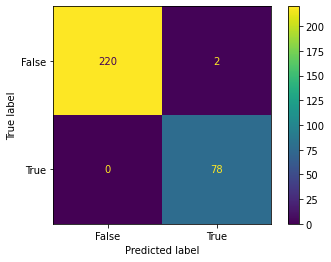

Kappa score 0.9828178694158075
Model:  DecisionTreeClassifier()
0.743 (+/-0.096) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'best'}
0.697 (+/-0.051) for {'m__criterion': 'gini', 'm__max_depth': 2, 'm__splitter': 'random'}
0.771 (+/-0.075) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'best'}
0.763 (+/-0.098) for {'m__criterion': 'gini', 'm__max_depth': 10, 'm__splitter': 'random'}
0.769 (+/-0.073) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'best'}
0.767 (+/-0.079) for {'m__criterion': 'gini', 'm__max_depth': 20, 'm__splitter': 'random'}
0.772 (+/-0.067) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'best'}
0.771 (+/-0.066) for {'m__criterion': 'gini', 'm__max_depth': None, 'm__splitter': 'random'}
0.728 (+/-0.081) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'best'}
0.707 (+/-0.024) for {'m__criterion': 'entropy', 'm__max_depth': 2, 'm__splitter': 'random'}
0.791 (+/-0.062) for {'m__crit

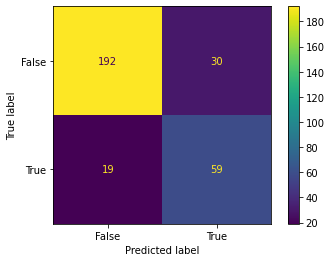

Kappa score 0.5941020543406229
Model:  KNeighborsClassifier()
0.872 (+/-0.07) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.875 (+/-0.065) for {'m__metric': 'minkowski', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.83 (+/-0.061) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.842 (+/-0.063) for {'m__metric': 'minkowski', 'm__n_neighbors': 50, 'm__weights': 'distance'}
0.796 (+/-0.066) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'uniform'}
0.809 (+/-0.062) for {'m__metric': 'minkowski', 'm__n_neighbors': 100, 'm__weights': 'distance'}
0.872 (+/-0.07) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'uniform'}
0.875 (+/-0.065) for {'m__metric': 'euclidean', 'm__n_neighbors': 5, 'm__weights': 'distance'}
0.83 (+/-0.061) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': 'uniform'}
0.842 (+/-0.063) for {'m__metric': 'euclidean', 'm__n_neighbors': 50, 'm__weights': '

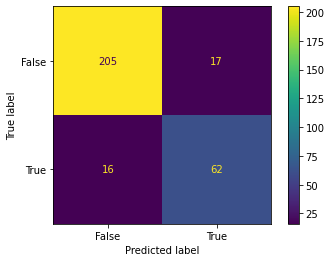

Kappa score 0.7153209109730849


In [34]:
#Iterates through the list of chosen classification models/parameters and feeds into the gridsearch function
for i in range(len(model)):
        mod = model[i]
        param = params[i]
        scaler = scaler
        print('Model: ',mod)
        gridsearch_cv(mod, param, scaler)

In [35]:
def final_classifier(prediction_set):
    #Implement a pipeline with a scaler, the selected SVC model and it's optimal parameters
    scaler = StandardScaler()
    model = SVC(C=100, gamma = 'auto', kernel = 'linear')
    pipeline = Pipeline(steps=[('s', scaler), ('m', model)])
    #Fit values to pipeline
    pipeline = pipeline.fit(X_train, Y_train.values.ravel())
    #Predict on given dataset (e.g. X_test) using the fitted pipeline
    y_pred = pipeline.predict(prediction_set)
    #Pull predictions into a pandas dataframe
    y_pred = pd.DataFrame(y_pred)
    print('Chosen model: Support Vector Classification'
          '\nChosen hyperparameters: C=100, gamma = auto, kernel = linear \n')
    return pipeline, y_pred

Part 2: Regression on non-zero outputs from classifier

In [36]:
#Take a selection of the dataset to use for the regression analysis
dataset_reg = dataset.iloc[:, 0:12]

In [37]:
#Use the classifier to predict the True/False class (True = 0, False = Non-zero)
pipe, y_pred_final = final_classifier(dataset_reg)
y_pred_final = pd.DataFrame(y_pred_final)
#Add the predicted class and original Target columns on to the dataset
dataset_reg['Class'] = y_pred_final
dataset_reg['Target'] = dataset['Target']

Chosen model: Support Vector Classification
Chosen hyperparameters: C=100, gamma = auto, kernel = linear 



In [38]:
#Check the dataset to ensure they've been added correctly
dataset_reg.head(10)

,F2,F6,F7,F9,F11,F12,F14,F15,F4_Europe,F4_Rest,F4_UK,F4_USA,Class,Target
0,6,1030.95,614.70,11.96,-333.60,1.86,6,4,0,0,1,0,False,1605.31
1,12,1059.87,1354.00,3.80,-356.04,6.39,2,0,1,0,0,0,True,0.00
2,6,1320.03,1477.96,20.32,-353.58,13.14,8,1,0,0,0,1,False,3241.77
3,12,1696.92,750.14,4.78,-254.37,15.48,10,0,0,0,0,1,True,0.00
4,3,1451.37,251.06,2.06,-379.77,3.90,10,0,0,1,0,0,False,336.25
5,3,1487.33,1306.14,0.68,-457.65,14.70,14,1,0,0,1,0,False,1329.66
6,9,1186.75,932.94,9.08,-439.59,12.24,0,1,0,1,0,0,False,442.63
7,9,926.61,1639.46,9.98,-281.67,17.55,2,0,0,1,0,0,False,93.74
8,18,1214.24,1219.74,16.54,-335.52,19.41,8,1,1,0,0,0,False,1740.35
9,24,562.41,753.88,3.44,-315.90,24.72,8,1,0,0,1,0,False,869.92


In [39]:
#Pull in all the information for X
reg_X = dataset_reg
#Pull in the Target and Class for Y
reg_Y = dataset_reg.iloc[:, 12:14]
#Divide the values of Y by a constant (1000) to deal with the skewed nature of the Target
reg_Y['Target']= reg_Y['Target']/1000

In [40]:
#Check to ensure Target has been divided by 1000 correctly
reg_Y.head(10)

,Class,Target
0,False,1.60531
1,True,0.00000
2,False,3.24177
3,True,0.00000
4,False,0.33625
5,False,1.32966
6,False,0.44263
7,False,0.09374
8,False,1.74035
9,False,0.86992


In [41]:
#Split training and test data
reg_X_train, reg_X_test, reg_Y_train, reg_Y_test = train_test_split(reg_X, reg_Y, test_size = 0.2,random_state = 0)

In [42]:
#Splits the reg_X & reg_Y Test/train into just the records classified as non-zero
reg_X_train_false = reg_X_train.loc[reg_X_train['Class'] == 'False']
reg_X_test_false = reg_X_test.loc[reg_X_test['Class'] == 'False']
reg_Y_train_false = reg_Y_train.loc[reg_Y_train['Class'] == 'False']
reg_Y_test_false = reg_Y_test.loc[reg_Y_test['Class'] == 'False']

#Splits the reg_X & reg_Y Test/train into just the records classified as zero
reg_X_train_true = reg_X_train.loc[reg_X_train['Class'] == 'True']
reg_X_test_true = reg_X_test.loc[reg_X_test['Class'] == 'True']
reg_Y_train_true = reg_Y_train.loc[reg_Y_train['Class'] == 'True']
reg_Y_test_true = reg_Y_test.loc[reg_Y_test['Class'] == 'True']

#To perform regression on the zero class dataset, class and target are dropped from reg_X_train/test
reg_X_train_false = reg_X_train_false.drop(['Class', 'Target'], 1)
reg_X_test_false = reg_X_test_false.drop(['Class', 'Target'], 1)

#Class is now dropped from Y_train/test to leave Target as the label for regression
reg_Y_train_false = reg_Y_train_false.drop('Class', 1)
reg_Y_test_false = reg_Y_test_false.drop('Class', 1)

In [43]:
#List of all regression models chosen to iterate through gridsearch
reg_model = [SVR(), LinearRegression(), KNeighborsRegressor()]
#Parameters to be used in the gridsearch for each regression model
SVR_param = {
'm__kernel': ('linear','rbf'),
'm__C': [1, 10, 50, 100],
'm__gamma': ('auto','scale')
}
LR_param = {
'm__fit_intercept': ('True', 'False'),
'm__normalize': ('True', 'False'), 
}
knn_reg_param = {
'm__n_neighbors':[5,100],
'm__weights':('uniform','distance'),
'm__metric':('minkowski', 'euclidean','manhattan', 'chebyshev')
}
#List of the parameters to iterate through gridsearch function
reg_params = [SVR_param, LR_param, knn_reg_param]
#Scaler to be used for all models
scaler = StandardScaler()

In [44]:
#Gridsearch function taking models/parameters/scalers
def reg_gridsearch_cv(model, params, scaler):
    model = model
    parameters = params
    #Creates pipeline that takes the specified scaler and model
    reg_pipeline = Pipeline(steps=[('s', scaler), ('m', model)])
    cv_reg = GridSearchCV(reg_pipeline, parameters, cv=10)
    #Fits gridsearch to the non-zero training data
    cv_reg1 = cv_reg.fit(reg_X_train_false, reg_Y_train_false.values.ravel())
    #Calls function that prints the results from each fold of the Gridsearch and the best parameters
    gridsearch_results(cv_reg1)
    #Applies the optimal parameters from Gridsearch on to the non-zero test set
    reg_Y_pred = cv_reg1.predict(reg_X_test_false)
    #Calls the evaluation function that produces MSE/MAE/RMSE and R2 scores
    reg_evaluation(reg_Y_pred, reg_Y_test_false)

In [45]:
#Iterates through the list of chosen models/parameters and feeds into the gridsearch function
for i in range(len(reg_model)):
        reg_mod = reg_model[i]
        reg_param = reg_params[i]
        scaler = scaler
        print('Model: ',reg_mod)
        reg_gridsearch_cv(reg_mod, reg_param, scaler)

Model:  SVR()
0.852 (+/-0.042) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.927 (+/-0.026) for {'m__C': 1, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.852 (+/-0.042) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.927 (+/-0.026) for {'m__C': 1, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.852 (+/-0.042) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.943 (+/-0.018) for {'m__C': 10, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.852 (+/-0.042) for {'m__C': 10, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.943 (+/-0.018) for {'m__C': 10, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.852 (+/-0.042) for {'m__C': 50, 'm__gamma': 'auto', 'm__kernel': 'linear'}
0.942 (+/-0.018) for {'m__C': 50, 'm__gamma': 'auto', 'm__kernel': 'rbf'}
0.852 (+/-0.042) for {'m__C': 50, 'm__gamma': 'scale', 'm__kernel': 'linear'}
0.942 (+/-0.018) for {'m__C': 50, 'm__gamma': 'scale', 'm__kernel': 'rbf'}
0.852 (+/-0.042) for {'m__C': 100, 'm__gamma': 'auto', 'm__kernel': 'linear'}


In [46]:
def final_regressor(prediction_set):
    #Implement a pipeline with a scaler, SVC model and its optimal hyperparameters
    scaler = StandardScaler()
    model = SVR(C = 10, gamma = 'auto', kernel = 'rbf')
    reg_pipeline = Pipeline(steps=[('s', scaler), ('m', model)])
    #Fit pipeline to training data
    reg_pipeline = reg_pipeline.fit(reg_X_train_false, reg_Y_train_false.values.ravel())
    #Predict on given dataset (e.g. X_test) using the fitted pipeline
    reg_Y_pred = reg_pipeline.predict(prediction_set)
    print('Chosen model: Support Vector Regression'
          '\nChosen hyperparameters: C=10, gamma = auto, kernel = rbf \n')
    return reg_Y_pred

In [47]:
#Runs the final regression function with the non-zero test set and stores the predictions
reg_Y_pred = final_regressor(reg_X_test_false)

Chosen model: Support Vector Regression
Chosen hyperparameters: C=10, gamma = auto, kernel = rbf 



In [48]:
#Adds the predictions from the final_regressor function into the zero Y_test set to keep indexes aligned
reg_Y_test_false['Predict'] = reg_Y_pred

In [49]:
#Ensure that the predictions and zero test data has come together correctly
reg_Y_test_false.head(10)

,Target,Predict
471,1.04225,1.124898
9,0.86992,0.983151
1499,3.59135,1.833979
1411,2.13738,2.022614
737,3.59916,3.416511
260,1.32382,1.641256
1417,1.39887,1.559258
1370,0.63549,0.636590
1256,1.60029,1.571550
187,2.62478,2.605097


In [50]:
#Brings the non-zero and zero Target splits back together with the predictions
complete_test_prediction = pd.concat([reg_Y_test_false, reg_Y_test_true])
#Resort the index of the combined non-zero/zero predictions and test labels to the original order
complete_test_prediction = complete_test_prediction.sort_index()

In [51]:
complete_test_prediction.head(10)

,Target,Predict,Class
1,0.00000,NaN,True
2,3.24177,3.238125,NaN
4,0.33625,0.434663,NaN
5,1.32966,1.498203,NaN
9,0.86992,0.983151,NaN
14,1.09639,1.024159,NaN
18,1.46068,1.624576,NaN
19,0.37123,0.391273,NaN
22,0.00000,NaN,True
27,0.50655,0.476639,NaN


In [52]:
#Replace all NaN values from the zero classification to zero in the final predictions
complete_test_prediction['Predict'] = complete_test_prediction['Predict'].replace(np.nan, 0)

#Split the Targets/Predictions and rescale to the original values
reg_Y_target_rescaled = complete_test_prediction['Target']*1000
reg_Y_predict_rescaled = complete_test_prediction['Predict']*1000
#Transform any negative predictions into zero's as you cannot have a negative claim
reg_Y_predict_rescaled[reg_Y_predict_rescaled < 0] = 0

In [53]:
reg_Y_predict_rescaled.head(10)

1        0.000000
2     3238.125035
4      434.663394
5     1498.202785
9      983.151173
14    1024.159445
18    1624.575975
19     391.272732
22       0.000000
27     476.638696
Name: Predict, dtype: float64

In [55]:
#Evaluate the final predictions after rescaling and transforming negative values to zero
Mean_squared_error = mean_squared_error(reg_Y_target_rescaled, reg_Y_predict_rescaled)
Mean_absolute_error = mean_absolute_error(reg_Y_target_rescaled, reg_Y_predict_rescaled)
Root_mean_squared_error = sqrt(Mean_squared_error)
RSquared = r2_score(reg_Y_target_rescaled, reg_Y_predict_rescaled)
print('Mean Squared Error: {} \nMean Absolute Error: {} \nRoot Mean Squared Error: {} \nRSquared: {}\n'
      .format(Mean_squared_error,Mean_absolute_error,Root_mean_squared_error,RSquared))

Mean Squared Error: 45816.86254458669 
Mean Absolute Error: 109.19133205617423 
Root Mean Squared Error: 214.04873871290783 
RSquared: 0.960149457726817



In [56]:
#Deploy the model on a hold out test dataset

#Import test dataset
dataset_final = pd.read_csv('CE802_P3_Test.csv')
dataset_copied = dataset_final
#Drop off the Target column
dataset_final = dataset_final.iloc[:, 0:16]

In [57]:
dataset_final.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,154.97,9,0.57,USA,-14.34,1286.94,1913.38,-10.54,6.66,232.40,-440.10,12.51,22.99,4,Low,22482.82
1,78.99,6,2.31,USA,-16.17,1522.99,1458.10,-12.17,4.96,268.26,-328.74,21.03,20.80,12,High,17183.76
2,115.81,6,0.24,UK,6.84,979.23,1427.52,-11.22,4.74,233.43,-404.07,1.17,21.42,6,Very high,17585.36
3,48.99,9,1023.63,Rest,-12.75,1052.18,605.80,-9.75,11.46,261.27,-506.25,3.99,19.64,4,High,14621.10
4,71.39,6,1.68,Europe,-10.98,1235.64,-208.92,-11.45,12.76,332.18,-196.89,25.35,19.50,8,Medium,14624.56


In [58]:
#Apply the pre-processing steps

transform = {"F15": {"Very low":0, "Low":1, "Medium":2, "High":3, "Very high":4}}
dataset_final.replace(transform, inplace=True)
dataset_final = pd.get_dummies(dataset_final, columns= ['F4'])
dataset_final = dataset_final.drop(columns = ['F1','F3','F5','F8', 'F10','F13','F16'])

In [59]:
#Produce the True/False classification predictions
pipeline, class_predict = final_classifier(dataset_final)
#Apply the class predictions to the dataset
dataset_final['Class'] = class_predict
#Split the dataset into two sets by their class with True predicting the value is 0 and False predicting non-zero
dataset_final_false = dataset_final.loc[dataset_final['Class'] == 'False']
dataset_final_true = dataset_final.loc[dataset_final['Class'] == 'True']
print(dataset_final_true.shape)
print(dataset_final_false.shape)

Chosen model: Support Vector Classification
Chosen hyperparameters: C=100, gamma = auto, kernel = linear 

(431, 13)
(1069, 13)


In [60]:
#Now the dataset has been split, class column can be dropped from the non-zero set
dataset_final_false_pred = dataset_final_false.drop('Class', 1)

In [61]:
#Take the non-zero data from the classifier and run through the regression model
final_regression_predictions = final_regressor(dataset_final_false_pred)

Chosen model: Support Vector Regression
Chosen hyperparameters: C=10, gamma = auto, kernel = rbf 



In [62]:
#Apply the Support Vector Regression model predictions to the non-zero set
dataset_final_false['Target'] = final_regression_predictions

In [63]:
dataset_final_false.head()

,F2,F6,F7,F9,F11,F12,F14,F15,F4_Europe,F4_Rest,F4_UK,F4_USA,Class,Target
0,9,1286.94,1913.38,6.66,-440.10,12.51,4,1,0,0,0,1,False,0.414867
1,6,1522.99,1458.10,4.96,-328.74,21.03,12,3,0,0,0,1,False,2.209702
2,6,979.23,1427.52,4.74,-404.07,1.17,6,4,0,0,1,0,False,1.156654
3,9,1052.18,605.80,11.46,-506.25,3.99,4,3,0,1,0,0,False,1.274215
4,6,1235.64,-208.92,12.76,-196.89,25.35,8,2,1,0,0,0,False,2.301949


In [64]:
dataset_final_true.head()

,F2,F6,F7,F9,F11,F12,F14,F15,F4_Europe,F4_Rest,F4_UK,F4_USA,Class
5,18,2085.10,2904.28,2.74,-247.32,21.81,10,4,0,0,0,1,True
6,12,1074.25,1042.90,1.46,-266.43,4.53,6,3,1,0,0,0,True
14,12,1223.93,1586.52,2.96,-286.11,0.12,6,4,0,1,0,0,True
18,27,1643.88,1337.24,4.98,-480.75,2.40,4,0,0,0,0,1,True
19,9,1514.24,711.62,5.28,-248.52,10.11,6,1,0,0,1,0,True


In [65]:
#Change true values to zero
dataset_final_true['Target'] = 0
#Merge together the regression predictions for the non-zero set and the zero set
final_results = pd.concat([dataset_final_false, dataset_final_true])
#resort the index back to the original order of the dataset
final_results = final_results.sort_index()
#Keep only the predicted target values
final_results = final_results.iloc[:, [13]]

In [66]:
#Rescale the predictions back to their original form
final_results = final_results*1000
#Turn all negative numbers into zero
final_results[final_results < 0] = 0
#Round figures so it reflects currency values
final_results = round(final_results,2)

In [67]:
final_results.head(30)

,Target
0,414.87
1,2209.70
2,1156.65
3,1274.21
4,2301.95
5,0.00
6,0.00
7,746.43
8,1123.53
9,2858.44


In [68]:
#Apply the final predictions to the copy of the original file
dataset_copied['Target'] = final_results
#Export the completed dataset with predictions to csv
dataset_copied.to_csv('CE802_P3_Test.csv', index = False)